# Convolutional Neural Networks

Is a specialized type of neural network model designed for working with two-dimensional image data, although they can be used with one-dimensional and three-dimensional data.

* the convolutional layer that gives the network its name involves a convolution which is a linear operation that involves the multiplication of a set of weights with the input.

* the multiplication is performed between an array of input data and a two-dimensional array of weights, called a filter or a kernel.

* The filter is smaller than the input data and the type of multiplication applied between a filter-sized patch of the input and the filter is a element wise dot product which is then summed, always resulting in a single value.

* Using a filter smaller than the input is intentional as it allows the same filter (set of weights) to be multiplied by the input array multiple times at different points on the input

* If the filter is designed to detect a specific type of feature in the input, then the application of that filter systematically across the entire input image allows the filter an opportunity to discover that feature anywhere in the image. This capability is commonly referred to as translation invariance.

> Invariance to local translation can be a very useful property if we care more about whether some feature is present than exactly where it is. For example, when determining whether an image contains a face, we need not know the location of the eyes with pixel-perfect accuracy, we just need to know that there is an eye on the left side of the face and an eye on the right side of the face.

* Once a feature map is created, we can pass each value in the feature map through a nonlinearity, such as a ReLU, much like we do for the outputs of a fully connected layer.




In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1D Convolutional Layer

In [9]:
data=np.asarray([0, 0, 0, 1, 1, 0, 0, 0])
data=data.reshape(1,8,1)

The input to Keras must be three dimensional for a 1D convolutional layer.

* The first dimension refers to each input sample; in this case, we only have one sample. 
* The second dimension refers to the length of each sample; in this case, the length is eight. 
* The third dimension refers to the number of channels in each sample; in this case, we only have a single channel.

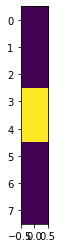

In [10]:
plt.imshow(data.reshape(-1,1))

In [11]:
# create the model
model=tf.keras.Sequential([tf.keras.layers.Conv1D(1,3,activation="relu",input_shape=(8,1))])

By default, the filters in a convolutional layer are initialized with random weights. But here we will manually specify the weights for the single filter.

In [24]:
detector=np.asarray([0,1,0])
weights=[np.asarray(detector.reshape(-1,1,1)),np.asarray([0.0])]
model.set_weights(weights)

In [25]:
model.get_weights()

[array([[[0.]],
 
        [[1.]],
 
        [[0.]]], dtype=float32),
 array([0.], dtype=float32)]

In [28]:
y_pred=model.predict(data)
print(y_pred)

[[[0.]
  [0.]
  [1.]
  [1.]
  [0.]
  [0.]]]


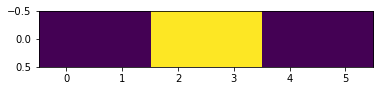

In [27]:
plt.imshow(y_pred)

## 2D Convolutional Layer

In [34]:
# define input data
data = [[0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0]]
data = np.asarray(data)
data = data.reshape(1, 8, 8, 1)
# create model
model1=tf.keras.Sequential([tf.keras.layers.Conv2D(1, (3,3), activation='relu', input_shape=(8, 8, 1))])
print(model1.summary())

# define a vertical line detector
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
weights = [np.asarray(detector), np.asarray([0.0])]
# store the weights in the model
model1.set_weights(weights)
# confirm they were stored
print(model1.get_weights())
# apply filter to input data
y_pred1 = model1.predict(data)
for r in range(y_pred1.shape[1]):
    # print each column in the row
    print([y_pred1[0,r,c,0] for c in range(y_pred1.shape[2])])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 6, 6, 1)           10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
None
[array([[[[0.]],

        [[1.]],

        [[0.]]],


       [[[0.]],

        [[1.]],

        [[0.]]],


       [[[0.]],

        [[1.]],

        [[0.]]]], dtype=float32), array([0.], dtype=float32)]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]


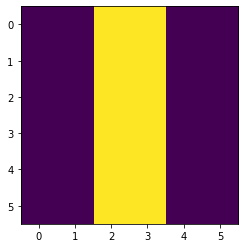

In [35]:
plt.imshow(tf.squeeze(y_pred1))

In [37]:
data.shape,y_pred1.shape

((1, 8, 8, 1), (1, 6, 6, 1))

# Convolution Neural network
The agenda for this field is to enable machines to view the world as humans do, perceive it in a similar manner and even use the knowledge for a multitude of tasks such as Image & Video recognition, Image Analysis & Classification, Media Recreation, Recommendation Systems, Natural Language Processing, etc. 

* The objective of the Convolution Operation is to extract the high-level features such as edges, from the input image. Convolutional layers in a convolutional neural network systematically apply learned filters to input images in order to create feature maps that summarize the presence of those features in the input

* A limitation of the feature map output of convolutional layers is that they record the precise position of features in the input. This means that small movements in the position of the feature in the input image will result in a different feature map. This can happen with re-cropping, rotation, shifting, and other minor changes to the input image.

* A common approach to addressing this problem from signal processing is called down sampling. This is where a lower resolution version of an input signal is created that still contains the large or important structural elements, without the fine detail that may not be as useful to the task.

* Down sampling can be achieved with convolutional layers by changing the stride of the convolution across the image. A more robust and common approach is to use a pooling layer.

* Pooling involves selecting a pooling operation, much like a filter to be applied to feature maps. The size of the pooling operation or filter is smaller than the size of the feature map; specifically, it is almost always 2×2 pixels applied with a stride of 2 pixels.

* This means that the pooling layer will always reduce the size of each feature map by a factor of 2, e.g. each dimension is halved, reducing the number of pixels or values in each feature map to one quarter the size

>The pooling operation is specified, rather than learned. Two common functions used in the pooling operation are:
- ` Average Pooling: Calculate the average value for each patch on the feature map.`
- ` Maximum Pooling (or Max Pooling): Calculate the maximum value for each patch of the feature map.`

## Average Pooling Layer

On two-dimensional feature maps, pooling is typically applied in 2×2 patches of the feature map with a stride of (2,2).


In [38]:
# create the model
# we can add padding also
model2= tf.keras.Sequential([tf.keras.layers.Conv2D(1,(3,3),activation="relu",input_shape=(8,8,1)),
                             tf.keras.layers.AveragePooling2D()])

# summarize the model
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 6, 6, 1)           10        
_________________________________________________________________
average_pooling2d (AveragePo (None, 3, 3, 1)           0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [39]:
# define a vertical line detector
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
weights = [np.asarray(detector), np.asarray([0.0])]
# store the weights in the model
model2.set_weights(weights)
# apply filter to input data
y_pred2 = model2.predict(data)
# enumerate rows
for r in range(y_pred2.shape[1]):
    # print each column in the row
    print([y_pred2[0,r,c,0] for c in range(y_pred2.shape[2])])

[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]


In [40]:
data.shape, y_pred2.shape

((1, 8, 8, 1), (1, 3, 3, 1))

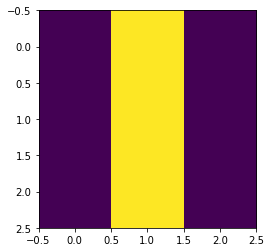

In [41]:
plt.imshow(tf.squeeze(y_pred2))

y_pred2 generated from model 2 with average pooling has reduced size as compared to y_pred generated from model 1. The same thing is evident from model summary also

## Max Pooling Layer

Maximum pooling, or max pooling, is a pooling operation that calculates the maximum, or largest, value in each patch of each feature map.

In [42]:
# create the model
# we can add padding also
model3= tf.keras.Sequential([tf.keras.layers.Conv2D(1,(3,3),activation="relu",input_shape=(8,8,1)),
                             tf.keras.layers.MaxPooling2D()])

# summarize the model
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 6, 6, 1)           10        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 1)           0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [46]:
# define a vertical line detector
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
weights = [np.asarray(detector), np.asarray([0.0])]
# store the weights in the model
model3.set_weights(weights)
# apply filter to input data
y_pred3 = model3.predict(data)
# enumerate rows
for r in range(y_pred3.shape[1]):
    # print each column in the row
    print([y_pred3[0,r,c,0] for c in range(y_pred3.shape[2])])

[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]


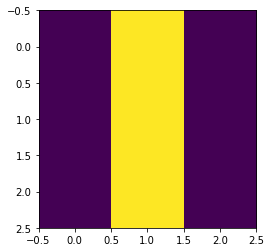

In [44]:
plt.imshow(tf.squeeze(y_pred3))

In [45]:
data.shape,y_pred3.shape

((1, 8, 8, 1), (1, 3, 3, 1))